In [2649]:
# Import necessary libraries
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.preprocessing import StandardScaler


In [2650]:
# Load dataset
df = pd.read_csv('dataset/train.csv')

df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


### Exploration

Check the types of columns present in the dataset

In [2651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

It is essential to ensure that each song appears only once in the dataset. Repeated songs can introduce biases during the model's training process.

In [2652]:
# Check for duplicate combinations of 'Track Name' and 'Artist Name'

def Check_for_duplicate_combinations(df):
    duplicate_combinations = df[df.duplicated(subset=['Track Name', 'Artist Name'], keep=False)]
    print(f"Number of duplicate combinations of 'Track Name' and 'Artist Name': {duplicate_combinations.shape[0]}")
    return duplicate_combinations

duplicate_comb = Check_for_duplicate_combinations(df)

# Group by 'Track Name' and 'Artist Name' to check if other features differ
duplicate_combination_groups = duplicate_comb.groupby(['Track Name', 'Artist Name']).apply(lambda x: x.drop_duplicates(subset=df.columns.difference(['Track Name', 'Artist Name'])))
duplicate_combination_groups

Number of duplicate combinations of 'Track Name' and 'Artist Name': 3553


/var/folders/w9/15qwbzr55nl9jbjfxphs8cxc0000gn/T/ipykernel_878/2981456360.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicate_combination_groups = duplicate_comb.groupby(['Track Name', 'Artist Name']).apply(lambda x: x.drop_duplicates(subset=df.columns.difference(['Track Name', 'Artist Name'])))


Artist Name  \
Track Name                 Artist Name                                
$1000 High Heel Shoes      Alice Cooper     12669      Alice Cooper   
                                            15929      Alice Cooper   
&Run                       Sir Sly          2408            Sir Sly   
                                            8590            Sir Sly   
(We Ain't Got) Nothin' Yet The Blues Magoos 11290  The Blues Magoos   
...                                                             ...   
◊û◊™◊ô ◊ú◊ó◊ñ◊ï◊®          Dudu Tassa       17093        Dudu Tassa   
◊†◊ò◊ú◊ô                   Tomer Yeshayahu  12610   Tomer Yeshayahu   
                                            15125   Tomer Yeshayahu   
◊™◊®◊©◊ï◊ù                 Lielle           3731             Lielle   
                                            7840             Lielle   

                                                                   Track Name  \
Track Name                 Artist Name                                          
$1000 High Heel Shoes      Alice Cooper     12669       $1000 High Heel Shoes   
                                            15929       $1000 High Heel Shoes   
&Run                       Sir Sly          2408                         &Run   
                                            8590                         &Run   
(We Ain't Got) Nothin' Yet The Blues Magoos 11290  (We Ain't Got) Nothin' Yet   
...                                                                       ...   
◊û◊™◊ô ◊ú◊ó◊ñ◊ï◊®          Dudu Tassa       17093           ◊û◊™◊ô ◊ú◊ó◊ñ◊ï◊®   
◊†◊ò◊ú◊ô                   Tomer Yeshayahu  12610                    ◊†◊ò◊ú◊ô   
                                            15125                    ◊†◊ò◊ú◊ô   
◊™◊®◊©◊ï◊ù                 Lielle           3731                   ◊™◊®◊©◊ï◊ù   
                                            7840                   ◊™◊®◊©◊ï◊ù   

                                                   Popularity  danceability  \
Track Name                 Artist Name                                        
$1000 High Heel Shoes      Alice Cooper     12669        41.0         0.654   
                                            15929        41.0         0.654   
&Run                       Sir Sly          2408         60.0         0.764   
                                            8590         60.0         0.764   
(We Ain't Got) Nothin' Yet The Blues Magoos 11290        38.0         0.398   
...                                                       ...           ...   
◊û◊™◊ô ◊ú◊ó◊ñ◊ï◊®          Dudu Tassa       17093        34.0         0.590   
◊†◊ò◊ú◊ô                   Tomer Yeshayahu  12610        33.0         0.711   
                                            15125        33.0         0.711   
◊™◊®◊©◊ï◊ù                 Lielle           3731         24.0         0.768   
                                            7840         24.0         0.768   

                                                   energy   key  loudness  \
Track Name                 Artist Name                                      
$1000 High Heel Shoes      Alice Cooper     12669   0.822   4.0    -3.160   
                                            15929   0.822   4.0    -3.160   
&Run                       Sir Sly          2408    0.661   5.0    -8.276   
                                            8590    0.661   5.0    -8.276   
(We Ain't Got) Nothin' Yet The Blues Magoos 11290   0.864  10.0    -8.199   
...                                                   ...   ...       ...   
◊û◊™◊ô ◊ú◊ó◊ñ◊ï◊®          Dudu Tassa       17093   0.509  11.0    -7.547   
◊†◊ò◊ú◊ô                   Tomer Yeshayahu  12610   0.505   3.0   -11.035   
                                            15125   0.505   3.0   -11.035   
◊™◊®◊©◊ï◊ù                 Lielle           3731    0.598   6.0    -9.952   
                                            7840    0.598   6.0    -9.952   

                                                

Remove these duplicates to maintain the integrity of the data

In [2653]:
# Remove exact duplicates
df = df.drop_duplicates(subset=['Track Name', 'Artist Name'], keep='first')

print(Check_for_duplicate_combinations(df))

# Reset index after removing rows
df.reset_index(drop=True, inplace=True)
df.info()

Number of duplicate combinations of 'Track Name' and 'Artist Name': 0
Empty DataFrame
Columns: [Artist Name, Track Name, Popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_in min/ms, time_signature, Class]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16109 entries, 0 to 16108
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         16109 non-null  object 
 1   Track Name          16109 non-null  object 
 2   Popularity          15727 non-null  float64
 3   danceability        16109 non-null  float64
 4   energy              16109 non-null  float64
 5   key                 14308 non-null  float64
 6   loudness            16109 non-null  float64
 7   mode                16109 non-null  int64  
 8   speechiness         16109 non-null  float64
 9   acousticness        16109 non-null  float64
 10

Check for any dominant classes among songs, artists, or the target class that could introduce biases into the dataset. A significant imbalance may skew the model's training.

In [2654]:
def plot_value_counts(df, column_name, color='blue', remove_labels=False):
    """Function to plot the counts of unique values in a specified column."""
    value_counts = df[column_name].value_counts()
    
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color=color)
    
    if remove_labels:
        plt.xticks([], [])  # Remove x-axis labels for clarity
        
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(f'{column_name} Index')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def calculate_most_repeated_value(df, column_name):
    """Function to find the most repeated value in a specified column and its percentage representation."""
    value_counts = df[column_name].value_counts()
    
    most_repeated_value = value_counts.idxmax()
    most_repeated_count = value_counts.max()
    
    total_count = df.shape[0]
    most_repeated_percentage = (most_repeated_count / total_count) * 100
    
    return most_repeated_value, most_repeated_count, most_repeated_percentage


In [2655]:
def analyze_categorical_data(df, column_of_interest, color='blue', remove_labels=False):
    plot_value_counts(df, column_of_interest, 'orange', True)
    most_repeated_value, most_repeated_count, most_repeated_percentage = calculate_most_repeated_value(df, column_of_interest)

    # Print the results for general analysis
    print(f"The most repeated value in '{column_of_interest}' is: {most_repeated_value}")
    print(f"It appears {most_repeated_count} times, representing {most_repeated_percentage:.2f}% of the dataset.")

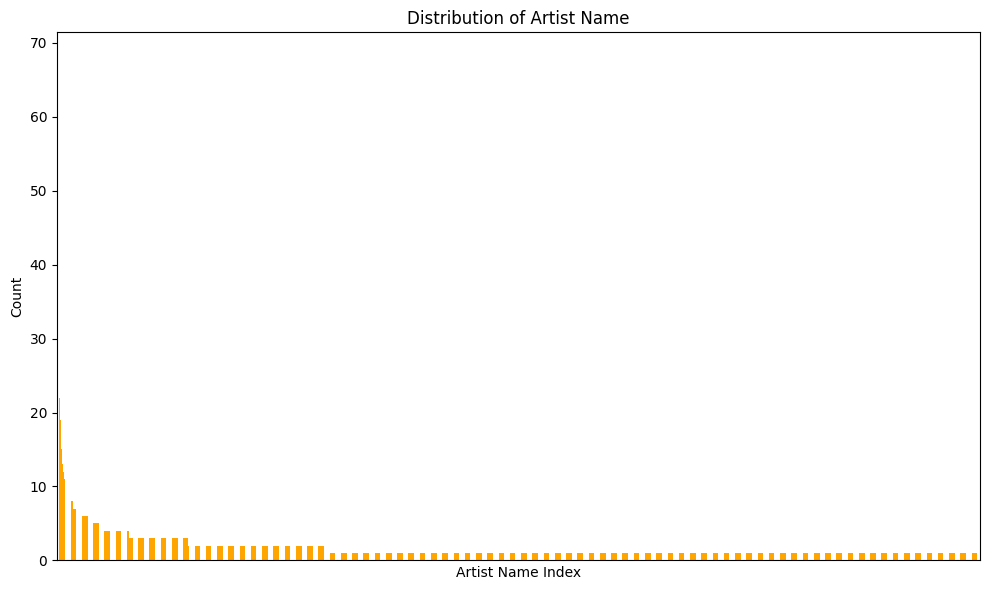

The most repeated value in 'Artist Name' is: Backstreet Boys
It appears 68 times, representing 0.42% of the dataset.


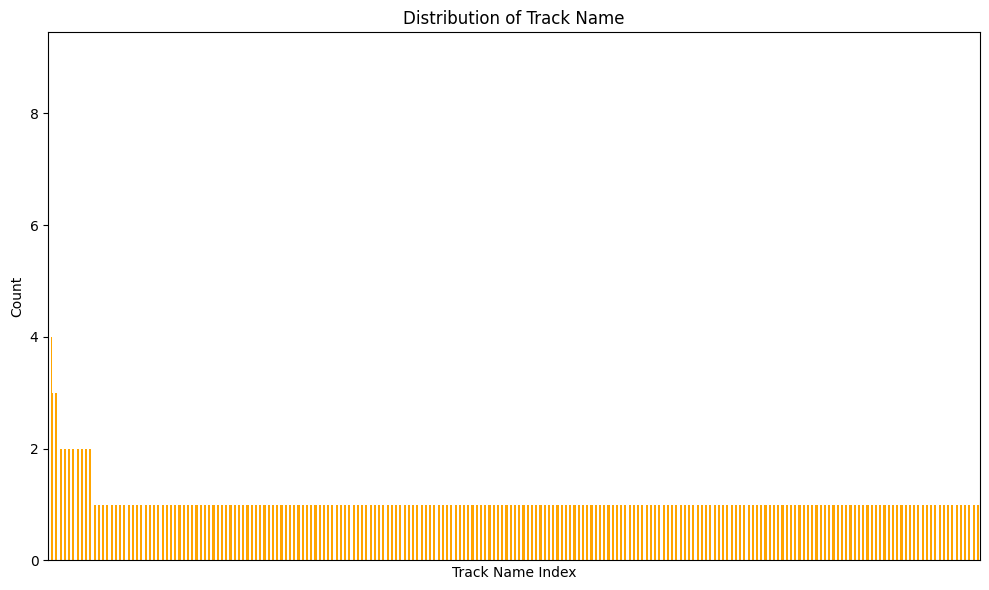

The most repeated value in 'Track Name' is: Dreams
It appears 9 times, representing 0.06% of the dataset.


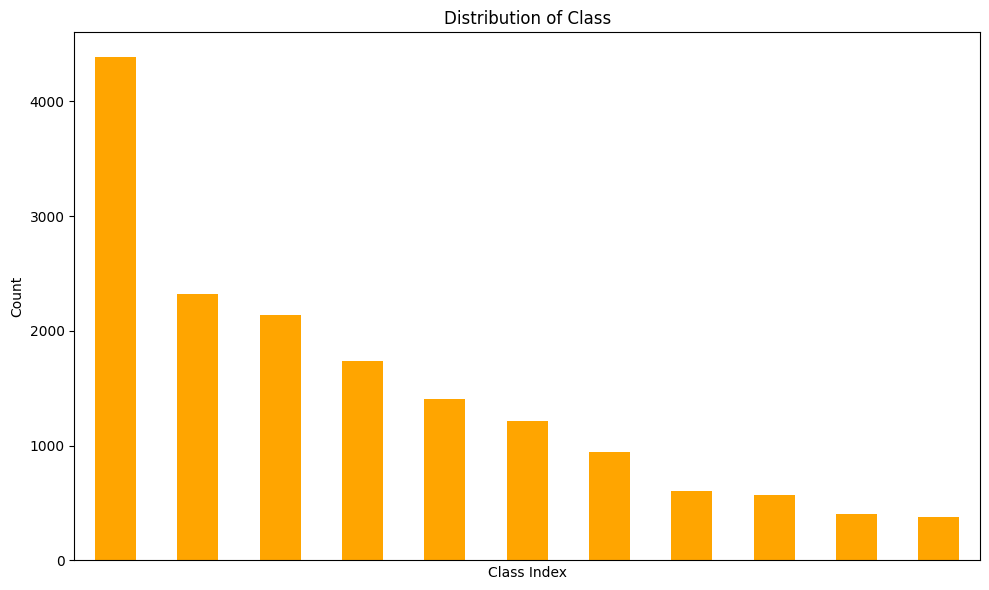

The most repeated value in 'Class' is: 10
It appears 4383 times, representing 27.21% of the dataset.


In [2656]:
analyze_categorical_data(df, 'Artist Name', 'orange', True)
analyze_categorical_data(df, 'Track Name', 'orange', True)
analyze_categorical_data(df, 'Class', 'black')

There is no significant dominance in either the artist or track names

Target Distribution Analysis: The distribution indicates that certain genres, such as Class 10, dominate the dataset, while others, like Class 4 and Class 3, are underrepresented. This imbalance needs to be addressed later to ensure the model is trained effectively.

#### Visualizing Distributions of Variables

In [2657]:
def draw_plots(df, features, plot_type='boxplot', num_cols=3):
    """
    Draws specified types of plots for the given features in a DataFrame.

    Parameters:
    - df: The DataFrame containing the data.
    - features: A list of feature names to plot.
    - plot_type: The type of plot to create ('boxplot', 'hist', etc.).
    - num_cols: The number of columns to arrange the plots in.
    """
    # Determine the number of features
    num_features = len(features)
    
    # Calculate the number of rows needed based on the number of columns
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)
    
    # Set up the figure size and subplots
    plt.figure(figsize=(num_cols * 5, num_rows * 5))  # Adjust height based on number of features

    # Loop through each feature and create the specified plot
    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)  # Arrange in the specified number of rows and columns
        
        if plot_type == 'boxplot':
            sns.boxplot(x=df[feature])
            plt.title(f'Boxplot of {feature}')
        elif plot_type == 'hist':
            sns.histplot(df[feature], kde=True)
            plt.title(f'Histogram of {feature}')
        # You can add more plot types here as needed
        else:
            raise ValueError("Unsupported plot type. Use 'boxplot' or 'hist'.")

    # Adjust layout
    plt.tight_layout()
    plt.show()

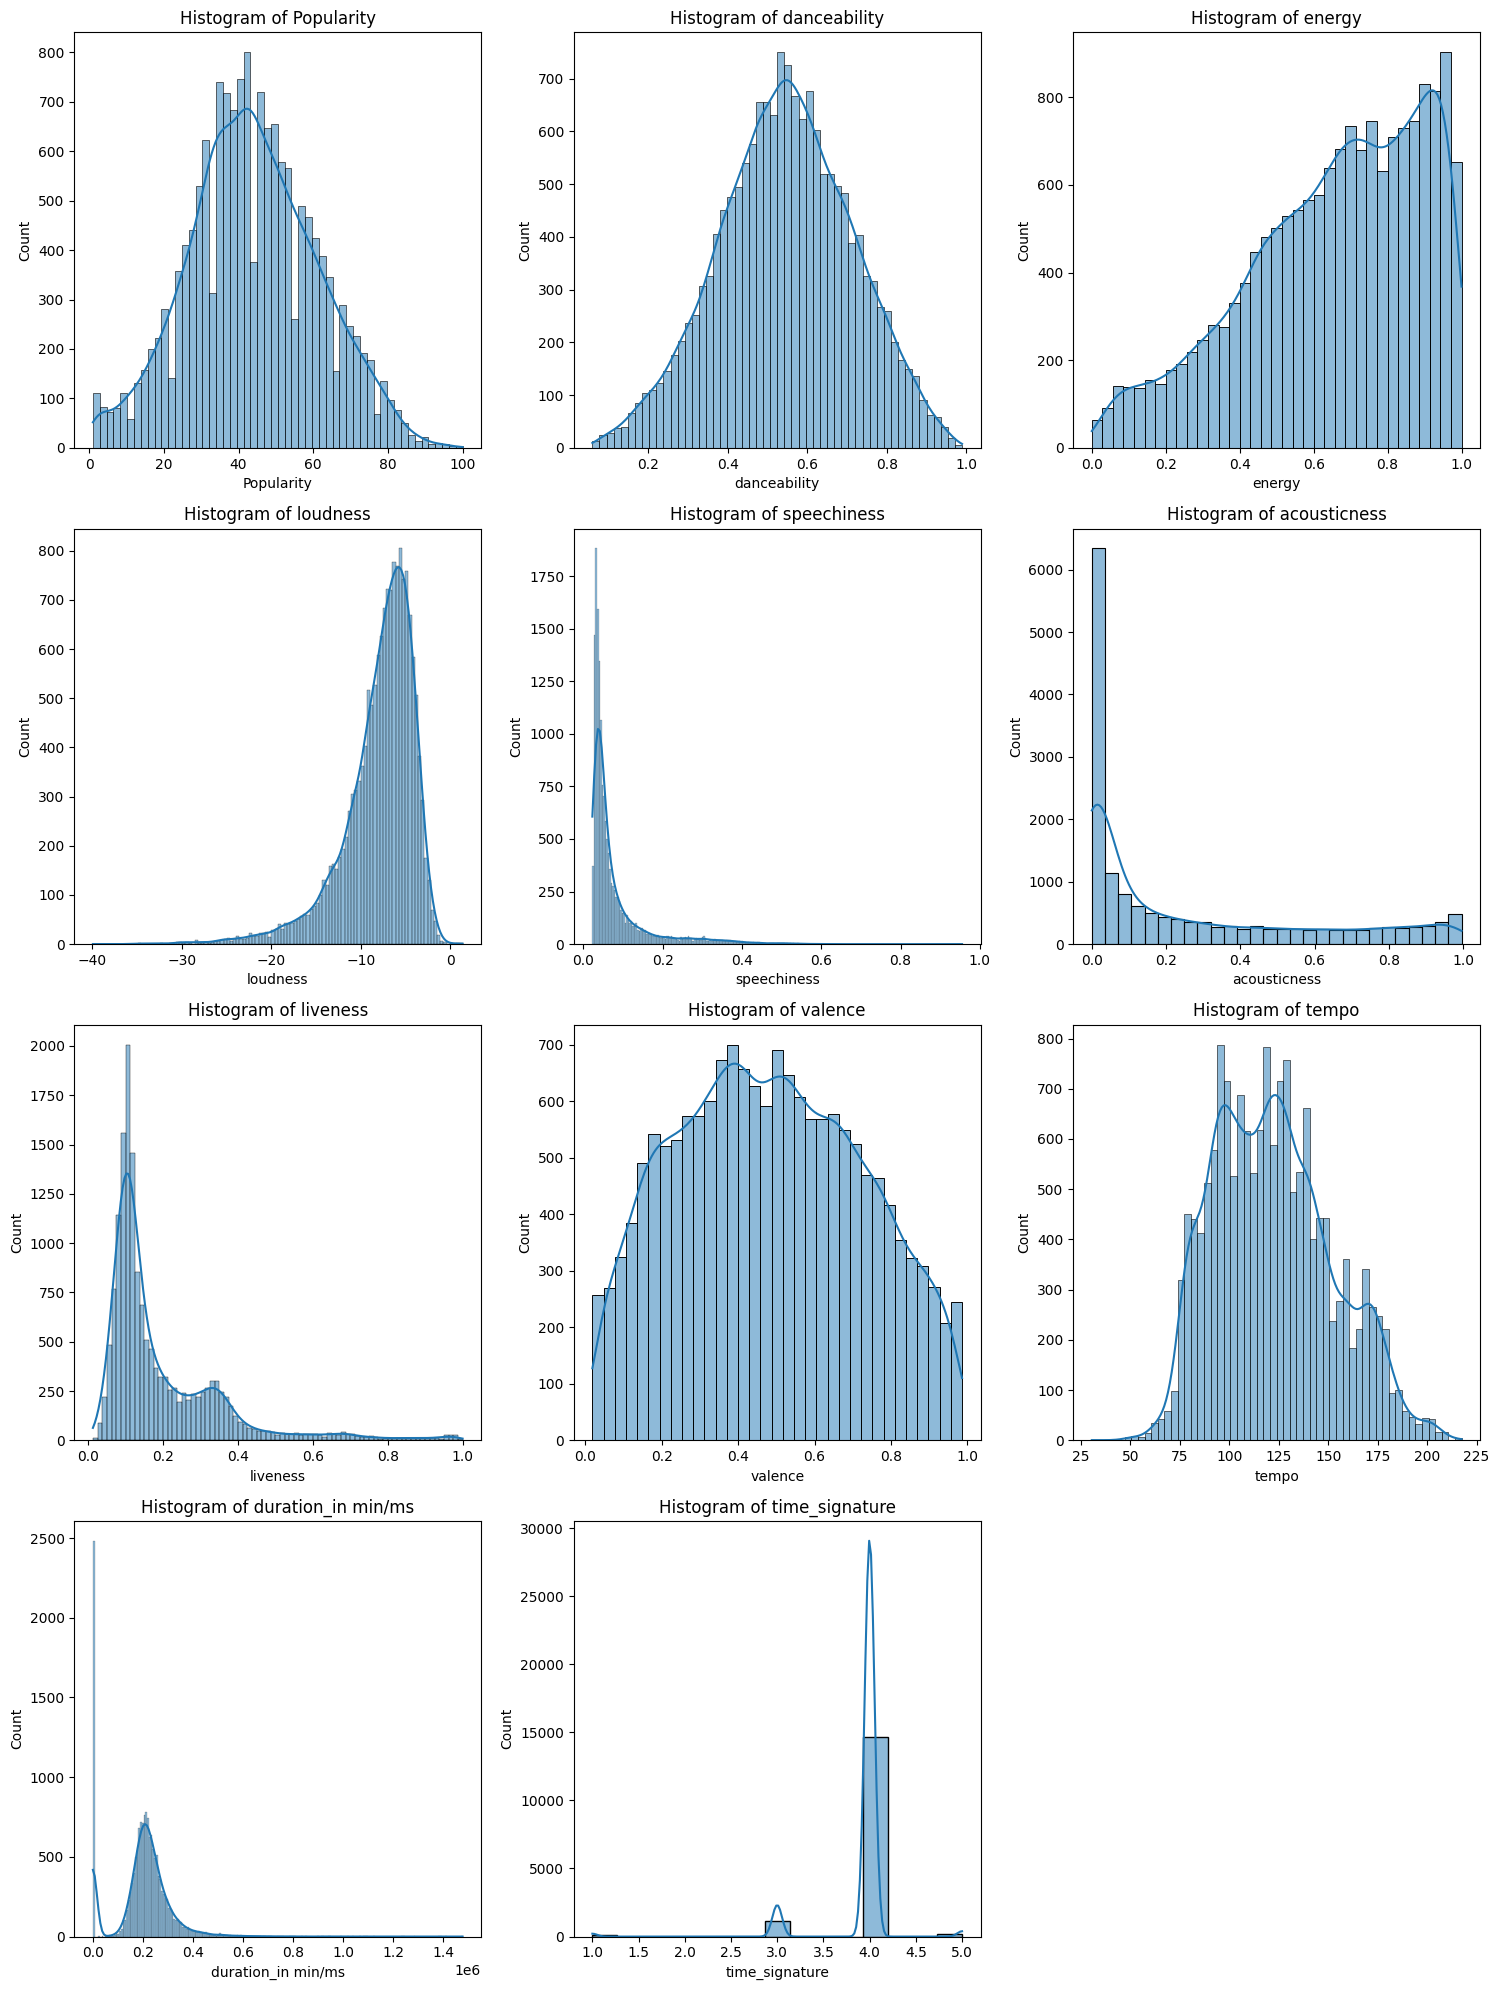

In [2658]:
# List of all numeric features (excluding 'Artist Name', 'Track Name', and 'Class')
numeric_features = ['Popularity', 'danceability', 'energy', 'loudness', 
                    'speechiness', 'acousticness', 'liveness', 'valence', 
                    'tempo', 'duration_in min/ms', 'time_signature']

draw_plots(df, numeric_features, plot_type='hist', num_cols=3)

### Missing Values Analysis

                    Missing Values  Percentage
Artist Name                      0    0.000000
Track Name                       0    0.000000
Popularity                     382    2.371345
danceability                     0    0.000000
energy                           0    0.000000
key                           1801   11.180086
loudness                         0    0.000000
mode                             0    0.000000
speechiness                      0    0.000000
acousticness                     0    0.000000
instrumentalness              4034   25.041902
liveness                         0    0.000000
valence                          0    0.000000
tempo                            0    0.000000
duration_in min/ms               0    0.000000
time_signature                   0    0.000000
Class                            0    0.000000


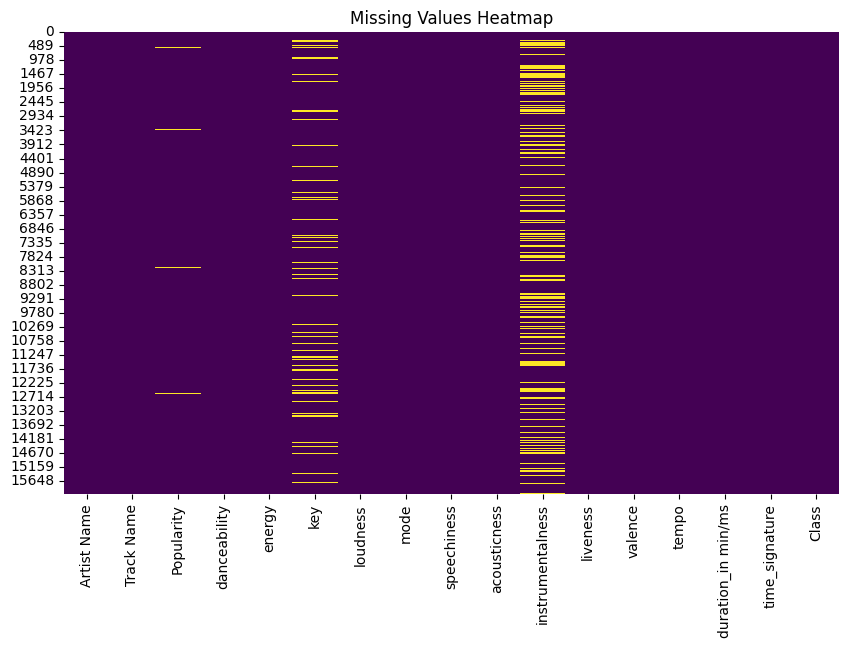

In [2659]:
def check_missing_values(df):
    """
    Check for missing values in the DataFrame and calculate the percentage of missing data for each column.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to check for missing values.
    
    Returns:
        pd.DataFrame: A DataFrame containing counts and percentages of missing values for each column.
    """
    # Check for missing values in each column
    missing_values = df.isnull().sum()
    
    # Calculate the percentage of missing data for each column
    missing_percentage = (missing_values / df.shape[0]) * 100
    
    # Create a DataFrame to hold both the counts and percentages of missing values
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    
    # Filter columns with missing values
    missing_data = missing_data[missing_data['Missing Values'] >= 0]
    
    return missing_data

def visualize_missing_values(df):
    """
    Visualize missing values in the DataFrame using a heatmap.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to visualize missing values.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

# Usage
missing_data_info = check_missing_values(df)
print(missing_data_info)
visualize_missing_values(df)


In [2660]:
# Dropping the 'instrumentalness' feature from the dataset
df = df.drop(columns=['instrumentalness'])

# Verify the changes by displaying the first few rows of the updated DataFrame
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10


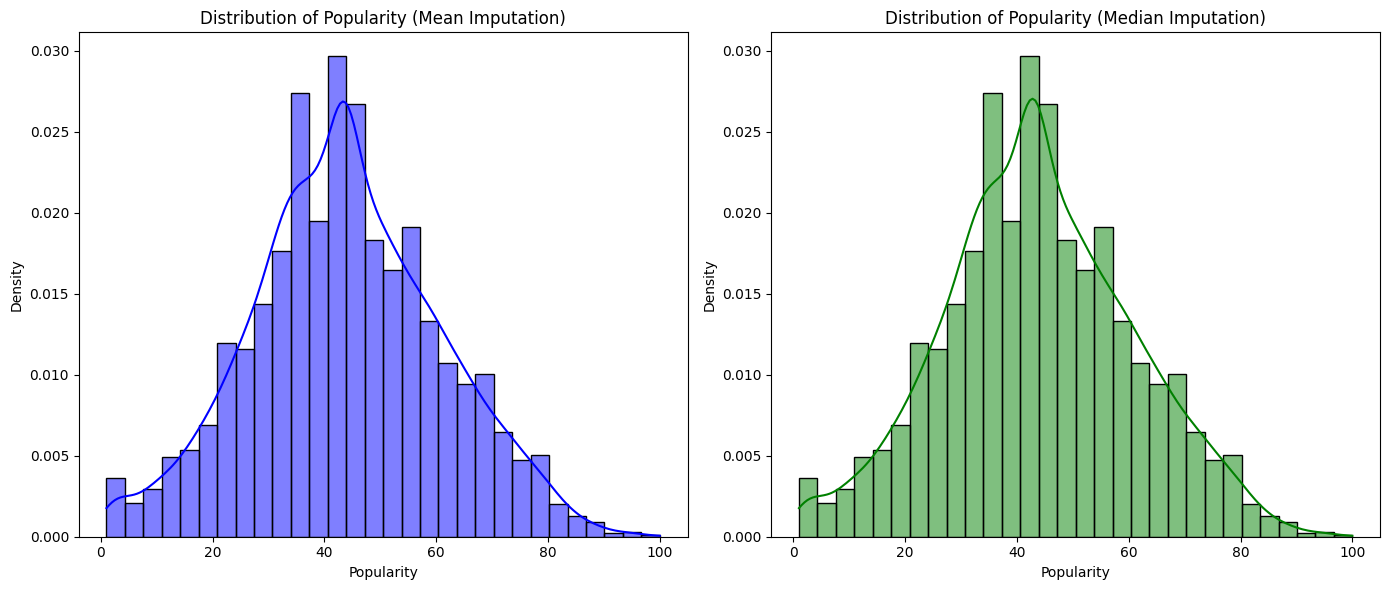

In [2661]:
# Create copies of the DataFrame for mean and median imputation
df_mean_imputed = df.copy()
df_mean_imputed['Popularity'] = df_mean_imputed['Popularity'].fillna(df_mean_imputed['Popularity'].mean())

df_median_imputed = df.copy()
df_median_imputed['Popularity'] = df_median_imputed['Popularity'].fillna(df_median_imputed['Popularity'].median())

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot for mean imputation
sns.histplot(df_mean_imputed['Popularity'], kde=True, color='blue', stat='density', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Popularity (Mean Imputation)')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Density')

# Plot for median imputation
sns.histplot(df_median_imputed['Popularity'], kde=True, color='green', stat='density', bins=30, ax=axes[1])
axes[1].set_title('Distribution of Popularity (Median Imputation)')
axes[1].set_xlabel('Popularity')
axes[1].set_ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [2662]:
# Apply mean imputation for 'Popularity' on the original dataframe
df['Popularity'] = df['Popularity'].fillna(df['Popularity'].mean())

In [2663]:
df = df.drop(columns=['key'])

# Verify the changes by displaying the first few rows of the updated DataFrame
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10


The "instrumentalness" feature was removed due to a significant amount of missing values and its low relevance in determining musical genre.

Similarly, the "key" feature was discarded because its meaning was unclear, making appropriate imputation challenging. 

For "Popularity," the missing values were filled using the mean, as both the mean and median were similar, reflecting the approximately normal distribution of the variable.

In [2664]:
missing_data_info = check_missing_values(df)
print(missing_data_info)

                    Missing Values  Percentage
Artist Name                      0         0.0
Track Name                       0         0.0
Popularity                       0         0.0
danceability                     0         0.0
energy                           0         0.0
loudness                         0         0.0
mode                             0         0.0
speechiness                      0         0.0
acousticness                     0         0.0
liveness                         0         0.0
valence                          0         0.0
tempo                            0         0.0
duration_in min/ms               0         0.0
time_signature                   0         0.0
Class                            0         0.0


### Outlier Analysis

In [2665]:
def calculate_outliers(df, numeric_features):
    """
    Calculate the number of outliers and their percentage for multiple numeric features.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    numeric_features (list): List of numeric features to analyze.

    Returns:
    outliers_dict (dict): Dictionary with the count of outliers for each feature.
    outliers_percentage (dict): Dictionary with the percentage of outliers for each feature.
    """
    # Dictionary to store outliers information
    outliers_dict = {}
    outliers_percentage = {}

    total_rows = df.shape[0]  # Total number of rows in the DataFrame

    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        # Store the number of outliers for this feature
        outliers_dict[feature] = len(outliers)
        outliers_percentage[feature] = (len(outliers) / total_rows) * 100

    return outliers_dict, outliers_percentage

# Example usage
numeric_features = ['Popularity', 'danceability', 'energy', 'loudness', 
                    'speechiness', 'acousticness', 'liveness', 'valence', 
                    'tempo', 'duration_in min/ms']

outliers_dict, outliers_percentage = calculate_outliers(df, numeric_features)

outliers_df = pd.DataFrame({
    'Outliers Count': outliers_dict,
    'Outliers Percentage': outliers_percentage
})

# Sort the DataFrame by Outliers Percentage for better readability
outliers_df = outliers_df.sort_values(by='Outliers Percentage')

# Print the DataFrame
print(outliers_df)

                    Outliers Count  Outliers Percentage
energy                           0             0.000000
acousticness                     0             0.000000
valence                          0             0.000000
danceability                    23             0.142777
tempo                           35             0.217270
Popularity                      54             0.335216
loudness                       724             4.494382
liveness                       893             5.543485
speechiness                   1861            11.552548
duration_in min/ms            3057            18.976969


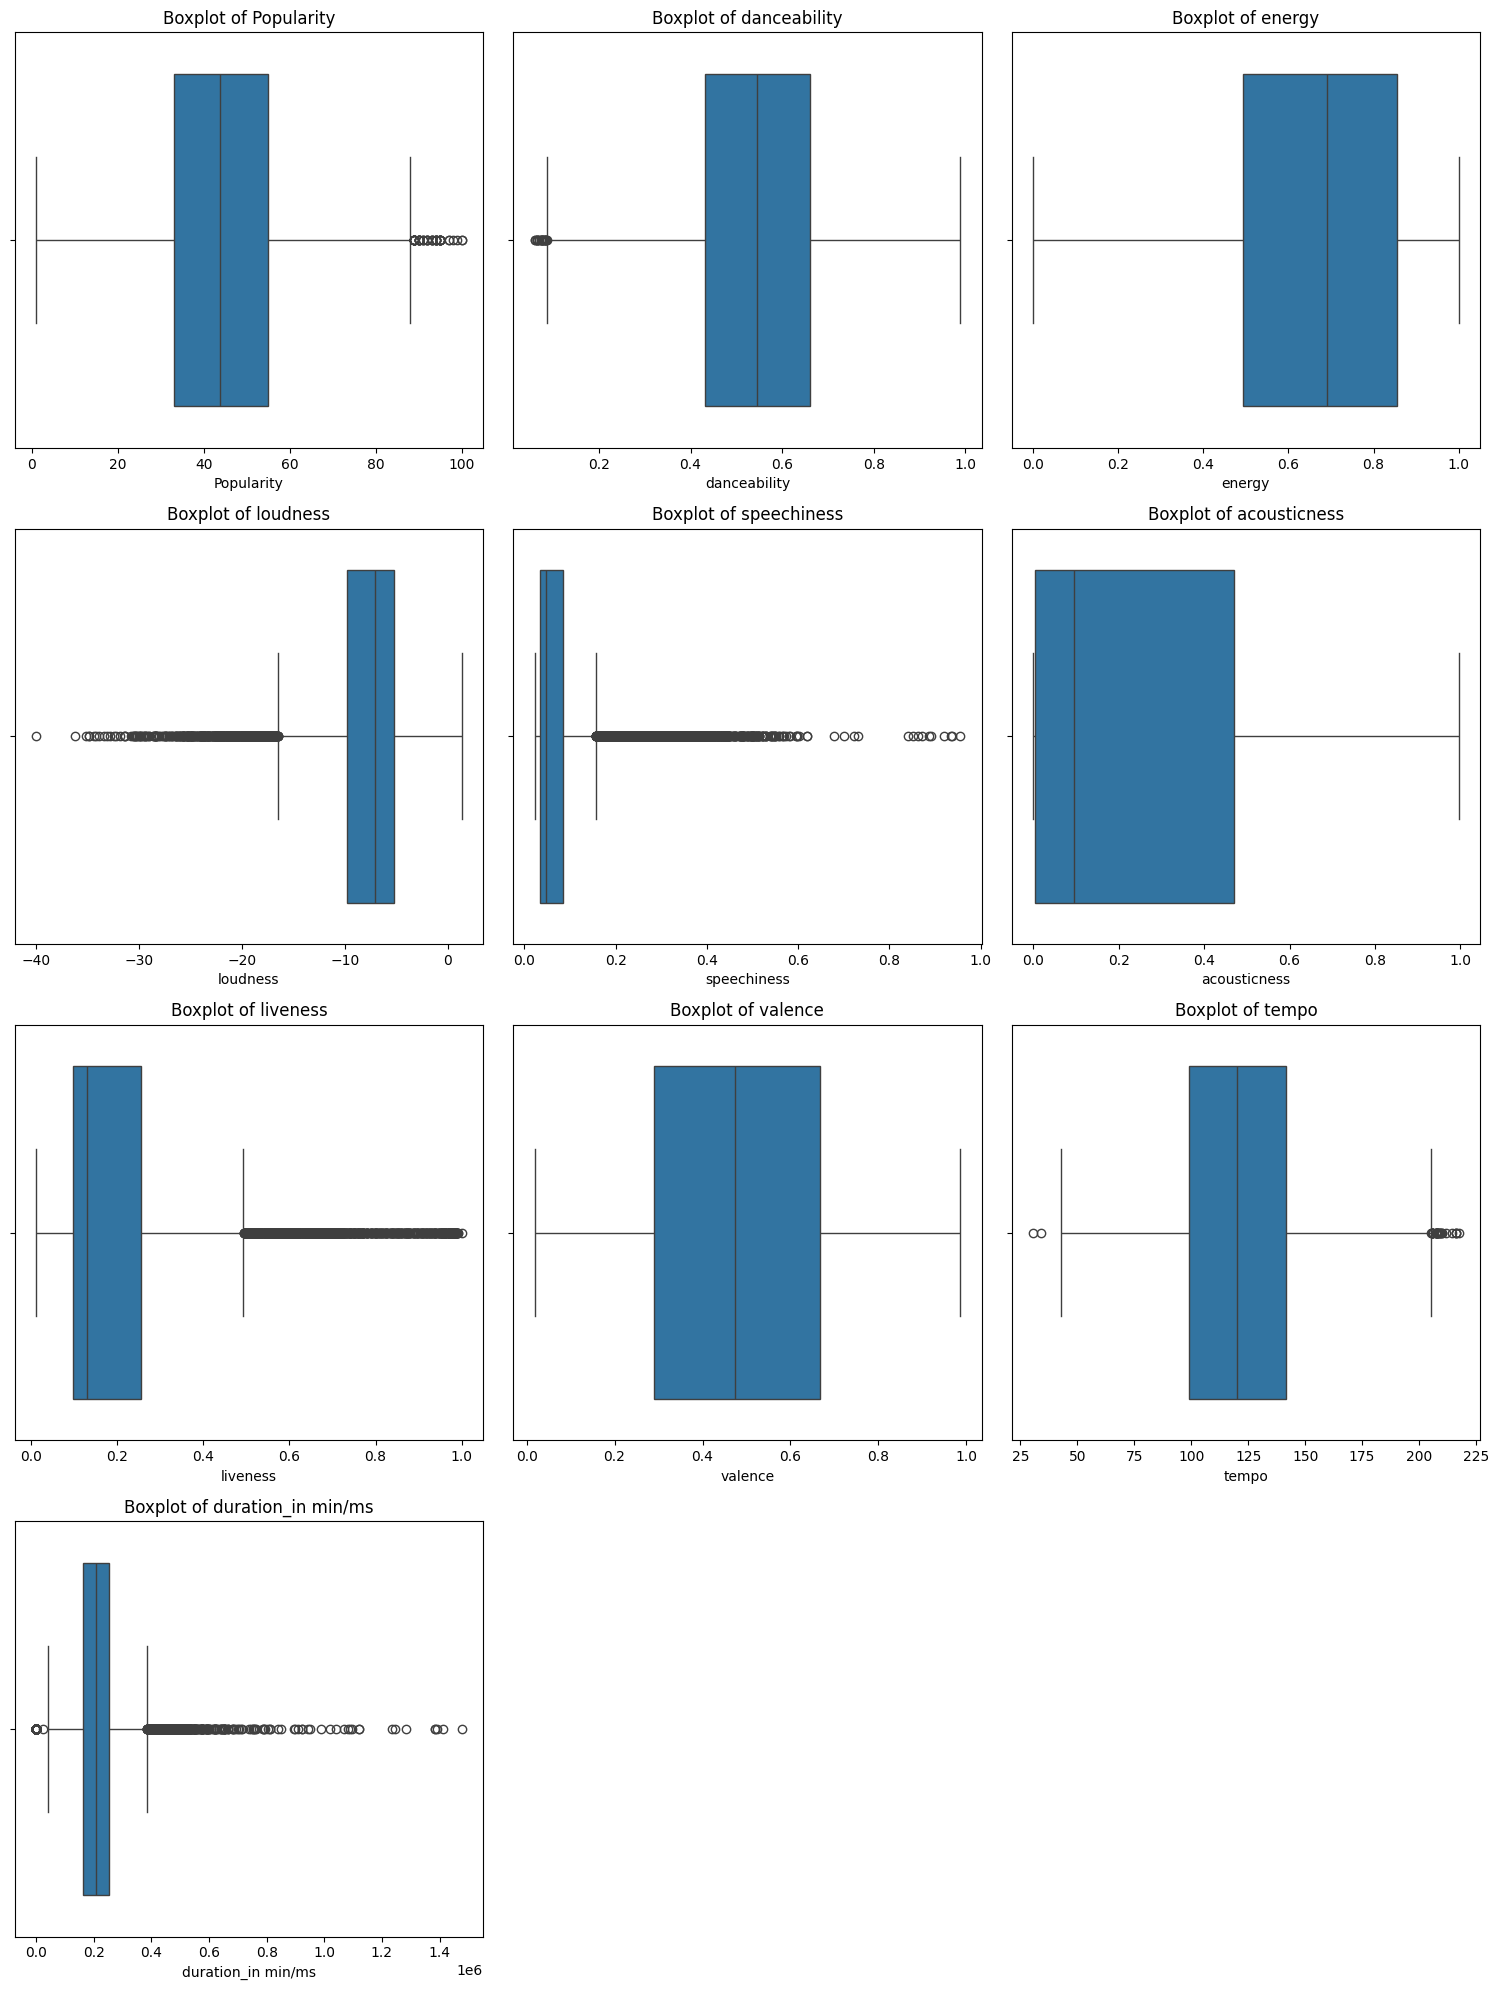

In [2666]:
# List of numeric features for analysis
numeric_features = ['Popularity', 'danceability', 'energy', 'loudness', 
                    'speechiness', 'acousticness', 'liveness', 'valence', 
                    'tempo', 'duration_in min/ms']

# Draw boxplots for all numeric features
draw_plots(df, numeric_features, plot_type='boxplot', num_cols=3)


Outliers were identified in several numerical features using the Interquartile Range (IQR) method

In [2667]:
# Now, removing the outliers for 'danceability', 'tempo', and 'popularity'
features_to_clean = ['Popularity', 'danceability', 'tempo']

# Removing outliers with a custom margin for each feature
for feature in features_to_clean:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Adjust the upper bound slightly to exclude exact-boundary outliers
    lower_bound = Q1 - 1.5 * IQR + 0.01
    upper_bound = Q3 + 1.5 * IQR + 0.01  # Slight margin added

    # Filter out data points outside these boundaries
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

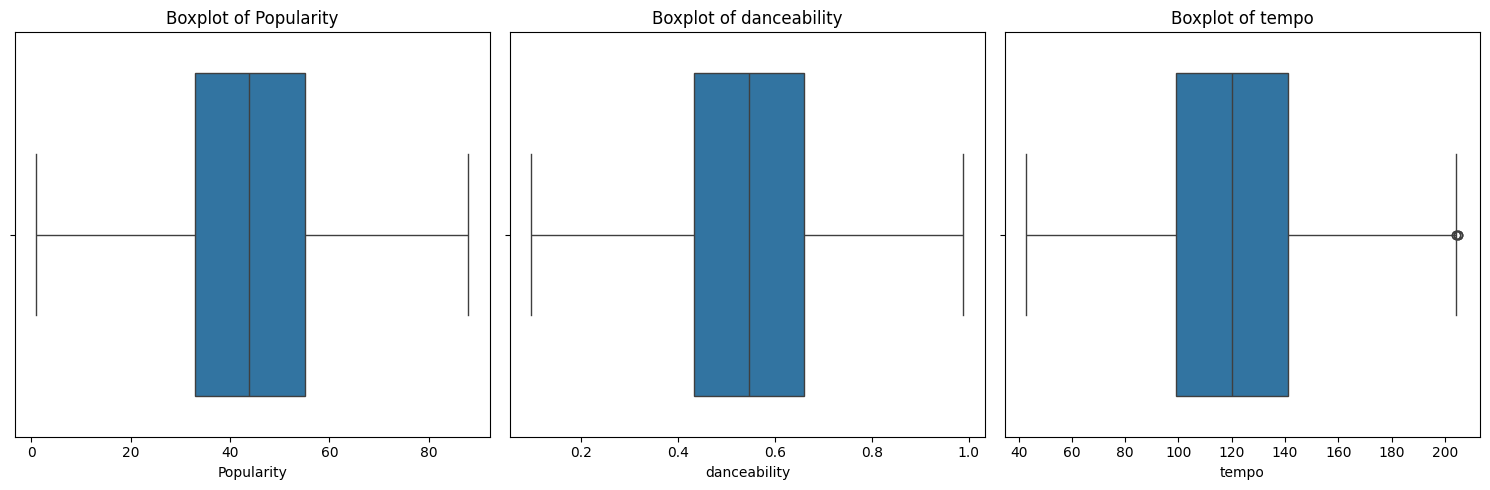

In [2668]:
draw_plots(df, features_to_clean, plot_type='boxplot', num_cols=3)

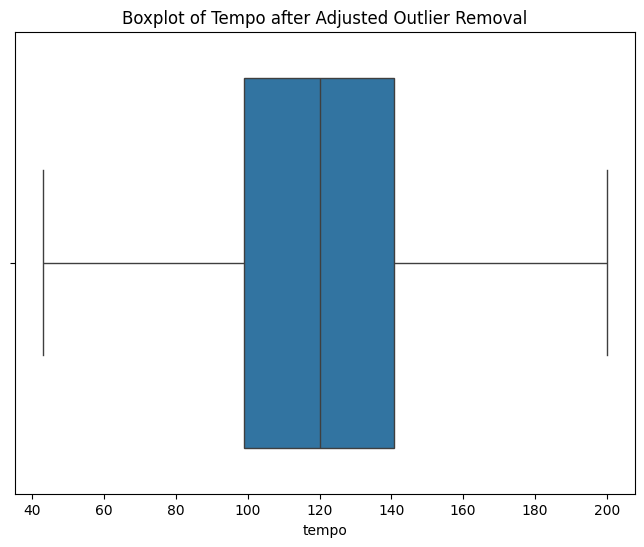

In [2669]:
df = df[df['tempo'] < 200]


# Check the boxplot again to confirm
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tempo'])
plt.title('Boxplot of Tempo after Adjusted Outlier Removal')
plt.show()


Outliers were removed from the features 'Popularity', 'danceability', 'tempo', due to their very small percentage representation.

Other features, such as 'loudness', 'liveness', 'speechiness', 'acousticness', 'valence', and 'duration_in min/ms', were retained despite having outliers because their percentages were slightly higher, suggesting a more significant presence in the dataset.

It is believed that the nature of these features may inherently allow for extreme values, reflecting the diversity and range of styles within the music genres. For example, variations in 'loudness' and 'speechiness' can be expected across different musical styles, which may result in higher values in certain tracks without necessarily indicating errors or inconsistencies in the data.

### Sampling to Address Class Imbalance:

The dataset showed class imbalance, with some genres underrepresented. To fix this, the Synthetic Minority Over-sampling Technique (SMOTE) was used, followed by Random Under-Sampling. This method generated synthetic samples for minority classes and reduced samples in majority classes to create a more balanced dataset.


The Track Name and Artist Name columns were removed from the dataset because they were not essential for modeling and did not provide useful information for predicting the target class. Their presence also complicated the sampling process, making it harder to apply techniques like SMOTE.

In [2670]:
df = df.drop(columns=['Artist Name', 'Track Name'])
X = df.drop(columns=['Class'])
y = df['Class']

Class
10    12.538740
9     11.882124
6     11.199244
8      8.987761
0      8.357409
1      8.357409
3      8.357409
4      8.357409
7      8.357409
5      7.312076
2      6.293008
Name: proportion, dtype: float64


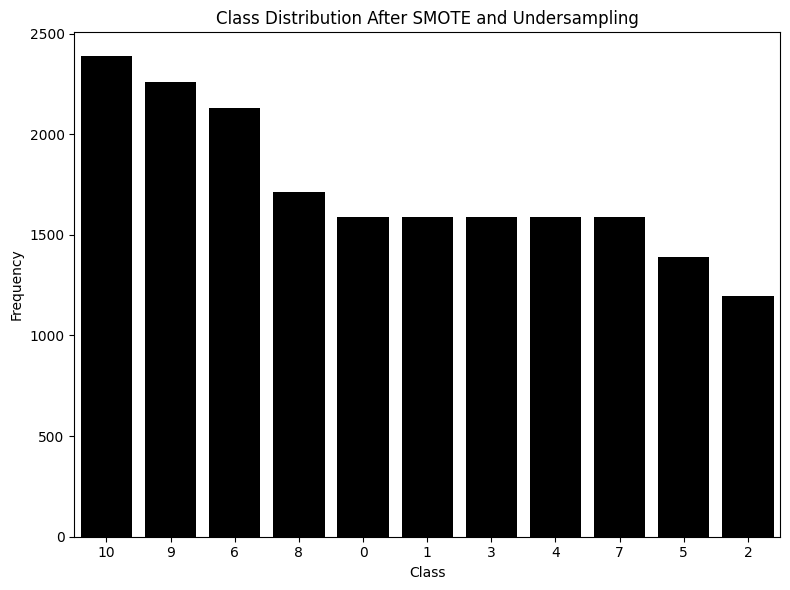

In [2671]:
def balance_classes_with_smote_and_undersampling(X, y):
    smote_strategy = {class_label: int(0.10 * len(y)) for class_label, count in y.value_counts().items() if count / len(y) < 0.07}
    under_strategy = {class_label: int(0.15 * len(y)) for class_label, count in y.value_counts().items() if count / len(y) > 0.15}

    # Pipeline with SMOTE followed by undersampling
    pipeline = Pipeline([
        ('smote', SMOTE(sampling_strategy=smote_strategy, random_state=42)),
        ('undersample', RandomUnderSampler(sampling_strategy=under_strategy, random_state=42))
    ])

    # Resampling
    X_resampled, y_resampled = pipeline.fit_resample(X, y)

    # Creating the new DataFrame
    df_final = pd.DataFrame(X_resampled, columns=X.columns)
    df_final['Class'] = y_resampled

    return df_final

# Resample the data
df_final = balance_classes_with_smote_and_undersampling(X, y)

# Calculate and visualize the class distribution
class_distribution = df_final['Class'].value_counts(normalize=True) * 100
print(class_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(x=df_final['Class'], order=df_final['Class'].value_counts().index, color='black')
plt.title('Class Distribution After SMOTE and Undersampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Final Dataset Analysis

In [2672]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19037 entries, 25 to 10598
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          19037 non-null  float64
 1   danceability        19037 non-null  float64
 2   energy              19037 non-null  float64
 3   loudness            19037 non-null  float64
 4   mode                19037 non-null  int64  
 5   speechiness         19037 non-null  float64
 6   acousticness        19037 non-null  float64
 7   liveness            19037 non-null  float64
 8   valence             19037 non-null  float64
 9   tempo               19037 non-null  float64
 10  duration_in min/ms  19037 non-null  float64
 11  time_signature      19037 non-null  int64  
 12  Class               19037 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 2.0 MB


In [2673]:
df_final.describe()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,19037.000000,19037.000000,19037.000000,19037.000000,19037.000000,19037.000000,19037.000000,19037.000000,19037.000000,19037.000000,1.903700e+04,19037.000000,19037.000000
mean,42.943779,0.544574,0.598114,-8.933785,0.616904,0.076135,0.353631,0.188869,0.480423,119.899435,1.504970e+05,3.869465,5.459316
std,17.084743,0.158445,0.252033,4.635737,0.486154,0.081476,0.348772,0.148386,0.240339,28.790645,1.296054e+05,0.425262,3.239039
min,1.000000,0.098500,0.000020,-36.214000,0.000000,0.022500,0.000000,0.011900,0.018300,42.956000,5.016500e-01,1.000000,0.000000
25%,32.000000,0.441889,0.426000,-10.894000,0.000000,0.034700,0.020500,0.100174,0.287000,97.012000,4.394797e+00,4.000000,3.000000
50%,43.810581,0.546000,0.628000,-7.858000,1.000000,0.045000,0.228000,0.128000,0.476000,118.001000,1.836370e+05,4.000000,6.000000
75%,54.000000,0.652000,0.804000,-5.684000,1.000000,0.075100,0.679917,0.233591,0.667000,139.808334,2.349230e+05,4.000000,8.000000
max,88.000000,0.989000,1.000000,1.342000,1.000000,0.955000,0.996000,1.000000,0.986000,199.999000,1.477187e+06,5.000000,10.000000


## Standardize data

In [2674]:
X = df_final.drop(columns=['Class'])  # Ajusta 'Class' según el nombre de tu columna de clase
y = df_final['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_final_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_final_scaled['Class'] = y.values

print(df_final_scaled.head())

# save dataset
df_final_scaled.to_csv('dataset/standard_train_data.csv', index=False)

El DataFrame estandarizado se ha guardado exitosamente como 'final_data_scaled.csv'.
   Popularity  danceability    energy  loudness      mode  speechiness  \
0    0.050737      0.021624  0.447913  0.106520  0.788034     0.378834   
1    0.050737     -0.136163 -0.623404 -0.214473  0.788034    -0.552756   
2    0.705690     -1.076575 -0.984478 -0.549272  0.788034     1.225735   
3    0.050737     -1.032395 -1.524104 -0.581415  0.788034    -0.520844   
4   -0.172309      0.633839 -1.067802 -1.662825  0.788034    -0.420198   

   acousticness  liveness   valence     tempo  duration_in min/ms  \
0      0.540106  1.119613  0.572443 -0.007796           -1.161193   
1      0.319326  1.187007  0.039848  1.783493           -1.161198   
2      1.403156 -0.005856 -1.462235 -1.578173           -1.161194   
3      1.692751 -0.558482 -0.363759  0.266815           -1.161196   
4     -0.328678  1.254400 -1.233386  0.284807           -1.161197   

   time_signature  Class  
0       -2.044592      0  
1

In [2675]:
# Save dataset without standardization

# df_final.to_csv('dataset/train_data.csv', index=False)

## Split standard data

In [2676]:
# Load the full dataset
df = pd.read_csv('dataset/standard_train_data.csv')

# Shuffle the data before splitting (important for randomness)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data
train_size = int(0.8 * len(df))  # 80% for training
df_train = df.iloc[:train_size]  # First 80% for training
df_test = df.iloc[train_size:]   # Last 20% for testing

# Save the split data to CSV files
df_train.to_csv('dataset/standard_final_train_data.csv', index=False)
df_test.to_csv('dataset/standard_final_test_data.csv', index=False)

print(f"Training data: {len(df_train)} instances")
print(f"Final test data: {len(df_test)} instances")

Training data: 15229 instances
Final test data: 3808 instances
